In [ ]:
'''
Sequence to Sequence (seq2seq) models is a special class of Recurrent Neural Network architectures that we typically 
use (but not restricted) to solve complex Language problems like below
    - Machine Translation
    - Question Answering
    - creating Chatbots
    - Text Summarization
    - Speech recognition
    - Video captioning


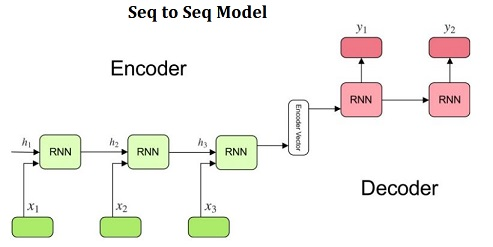

                                 The model consists of 3 parts: 
                                        1. Encoder
                                        2. Intermediate (Encoder Vector) 
                                        3. Decoder.

In [ ]:
'''
### Encoder
    1. Both encoder and the decoder are RNN or LSTM models (or sometimes GRU models)
    2. Encoder reads the input sequence and summarizes the information in something called the internal state vectors 
       or context vector.
    3. We discard the outputs of the encoder and only preserve the internal states. 
       This context vector aims to encapsulate the information for all input elements in order to help the decoder make 
       accurate predictions.

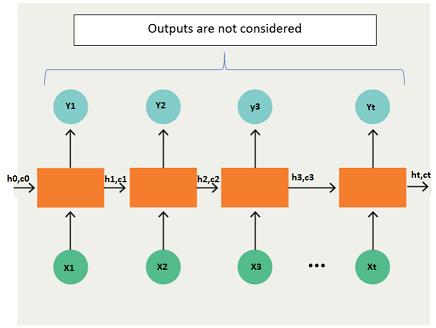

In [ ]:
'''
### Decoder
    1. The decoder is an LSTM, the context (encoded vector) vector of the encoder’s final cell is input to the first cell 
       of the decoder network. 
    2. Using these initial states (encoded vector), the decoder starts generating the output sequence,and these outputs 
       are also taken into consideration for future outputs.

In [ ]:
'''
Attention: 
    - The input to the decoder is a single vector that has to store all the information about the context.
      This becomes a problem with large sequences. 
      Hence the attention mechanism is applied which allows the decoder to look at the input sequence selectively.

In [ ]:
# 01 Encoder and Decoder LSTMs : Seq2Seq

One LSTM network encodes input sequences and a separate LSTM network decodes the encoding into an output sequence

The encoder-decoder model is a way of organizing recurrent neural networks for sequence-to-sequence prediction problems.

# Architecture of Encoder decoder LSTM

Input--> Encoder Model-->Decoder Model-->Dense-->output

# Application
    - Machine Translation
    - Learning To Execute
    - Image Caption
    - Conversational Modeling
    - Movement Classification
    
The approach involves two recurrent neural networks, 
    1. one to encode the source sequence, called the encoder, 
    2. second to decode the encoded source sequence into the target sequence, called the decoder.
    
    # Model Structure
    1. Define training encoder
    2. Define training decoder
    3. Define inference decoder
    4. Define inference loop to decode_sequence
    
    
Encoder-Decoder model consist of two LSTMs. One will serve as an encoder,encoding the input sequence and producing internal 
state vectors which serve as conditioning for the decoder.

The decoder, another LSTM, is responsible for predicting the individual characters of the target sequence. Its initial state 
is set to the state vectors from the encoder

Note : 
    1.Create encoder and get the encoder's internal state vectors
    2.use the encoder's internal state vectors for the decoder.

# Define Training Encoder :
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

Note : 
    1. Use the encoder's internal state vectors for the decoder.
    2. Build the Decoder using encoder_states 
    3. during the cretaing LSTM and return output at decoder we're not using the decoder's internal states during training
       but we will need them later for inference.
    
    4. Decoder's output we attach a Dense layer to the decoder's LSTM outputs.

# Define Trainig Decoder
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,initial_state=encoder_states) #nternal states not using for trainig
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Keras Function API
model = Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)

Intermediate vector : This is the final internal state produced from the encoder part of the model. 
                      It contains information about the entire input sequence to help the decoder make accurate predictions
        
# Define inference decoder
decoder_state_input_h = Input(shape=(n_units,))
decoder_state_input_c = Input(shape=(n_units,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

# Generate target given source sequenc using encode internal states and inference decoder